In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import keras
from keras.datasets import mnist
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

In [2]:

df=pd.read_csv('news.csv')
df.shape
df.head()
labels=df.label
labels.head()
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2,random_state=10)
#print(len(x_train),len(x_test))

list_of_words = []
for i in df.text:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))

tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)





train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)





In [3]:
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 








# Sequential Model
model = Sequential()
total_words=10000
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128))) # no of neurons

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,576,193
Trainable params: 1,576,193
Non-trainable params: 0
_________________________________________________________________


In [4]:
y_train = [s.replace('REAL', "1") for s in y_train]
y_train = [s.replace('FAKE', "0") for s in y_train]
y_train = [int(i) for i in y_train]
y_train = np.asarray(y_train)

In [5]:
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
505/505 [==============================] - 87s 162ms/step - loss: 0.0414 - acc: 0.9900 - val_loss: 0.0144 - val_acc: 0.9969
Epoch 2/2
505/505 [==============================] - 85s 169ms/step - loss: 0.0073 - acc: 0.9985 - val_loss: 0.0140 - val_acc: 0.9967


In [6]:
pred = model.predict(padded_test)


281/281 [==============================] - 7s 21ms/step


In [7]:
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append("REAL")
    else:
        prediction.append("FAKE")

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.977472956395673


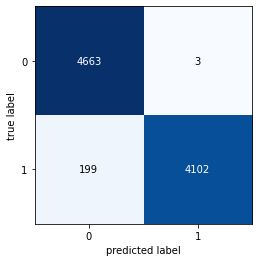

In [9]:
#!pip install seaborn

#import seaborn as sns
cm = confusion_matrix(list(y_test), prediction)
#plt.figure(figsize = (25, 25))
#sns.heatmap(cm, annot = True)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [56]:
# category dict
category = { "FAKE": 'Fake News', "REAL" : "Real News"}

In [57]:

precision = cm[0][0] / (cm[0][0]+cm[1][0])
print("Precision=",precision*100)
recall= cm[0][0] / (cm[0][0]+cm[0][1])
print("Recall=",recall*100)
f_measure = (2*precision*recall) / (precision + recall)
print("F-Measure=",f_measure*100)

Precision= 96.45816072908036
Recall= 99.80711530218602
F-Measure= 98.10406572572151
